<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

![Swan Logo](https://i.ibb.co/GVrJ6my/Swan-Telco.png)

# Group Two Swan Telco Project

## Importing Packages

In [2]:
# importing the necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample

# for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing Data

In [3]:
df = pd.read_excel('project_data.xlsx')

## Eyeballing Data

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


###### Replaing Spaces in Column Headings

In [4]:
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Reason'],
      dtype='object')

In [6]:
df.shape

(7043, 31)

In [7]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Label           object
Churn_Value            int64
Churn_Reason          object
dtype: object

#### Null Check

In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn_Label             0
Churn_Value             0
Churn_Reason         5174
dtype: int64

###### There are nulls in the Churn Reason column that make sense, customers don't always Churn and don't always give a reason, these will be ignored at a later date.

## EDA

#### Demography of Churn Value

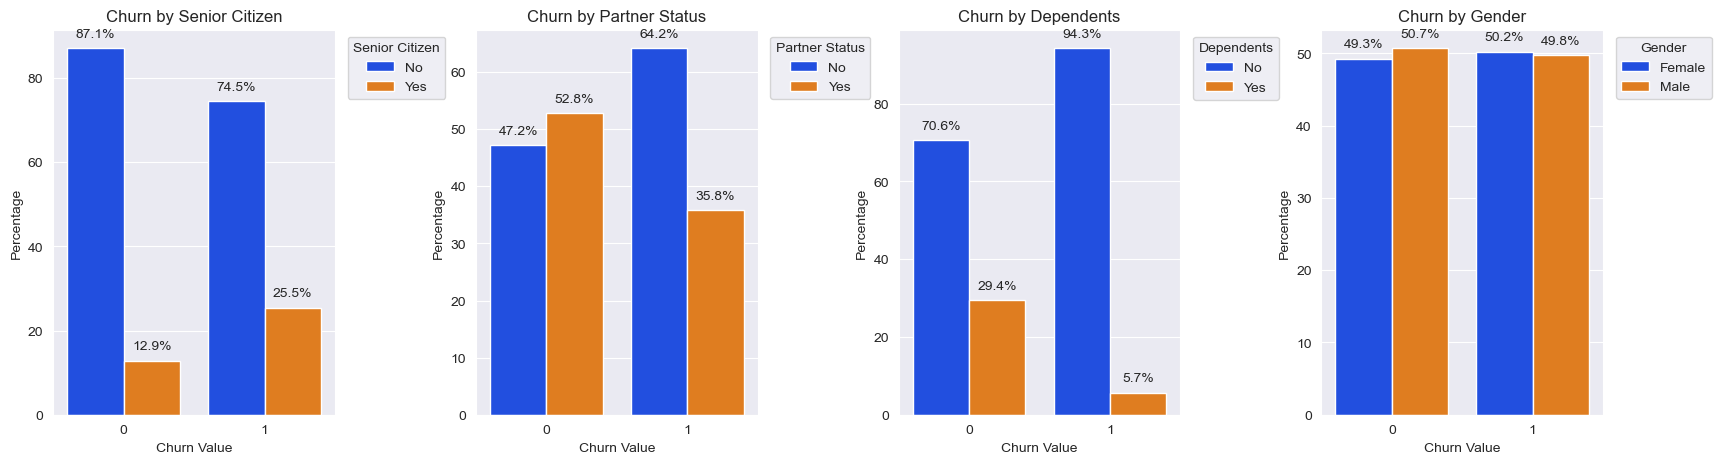

In [9]:
variables = ['Senior_Citizen', 'Partner', 'Dependents', 'Gender']
titles = ['Senior Citizen', 'Partner Status', 'Dependents', 'Gender']

fig, axes = plt.subplots(1, len(variables), figsize=(5*len(variables), 5))

for i, variable in enumerate(variables):
    # Calculate the percentage values for each 'Churn_Value' and the current variable
    perct_df = df.groupby('Churn_Value')[variable].value_counts(normalize=True).mul(100).rename('Percentage').reset_index().sort_values(by=variable)

    sns.barplot(data=perct_df, x='Churn_Value', y='Percentage', hue=variable, ax=axes[i], palette='bright')

    # Annotate the percentage values on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    axes[i].set_xlabel('Churn Value')
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(f'Churn by {titles[i]}')
    axes[i].legend(title=titles[i])
    axes[i].legend(title=titles[i], bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

###### Here we can see that:
 * Senior Citizens are more likely to Churn
 * People with no Partner are more likely to Churn
 * Those without Dependents are more likely to Churn
 * Gender seems to be evenly split.

#### Products and Churn

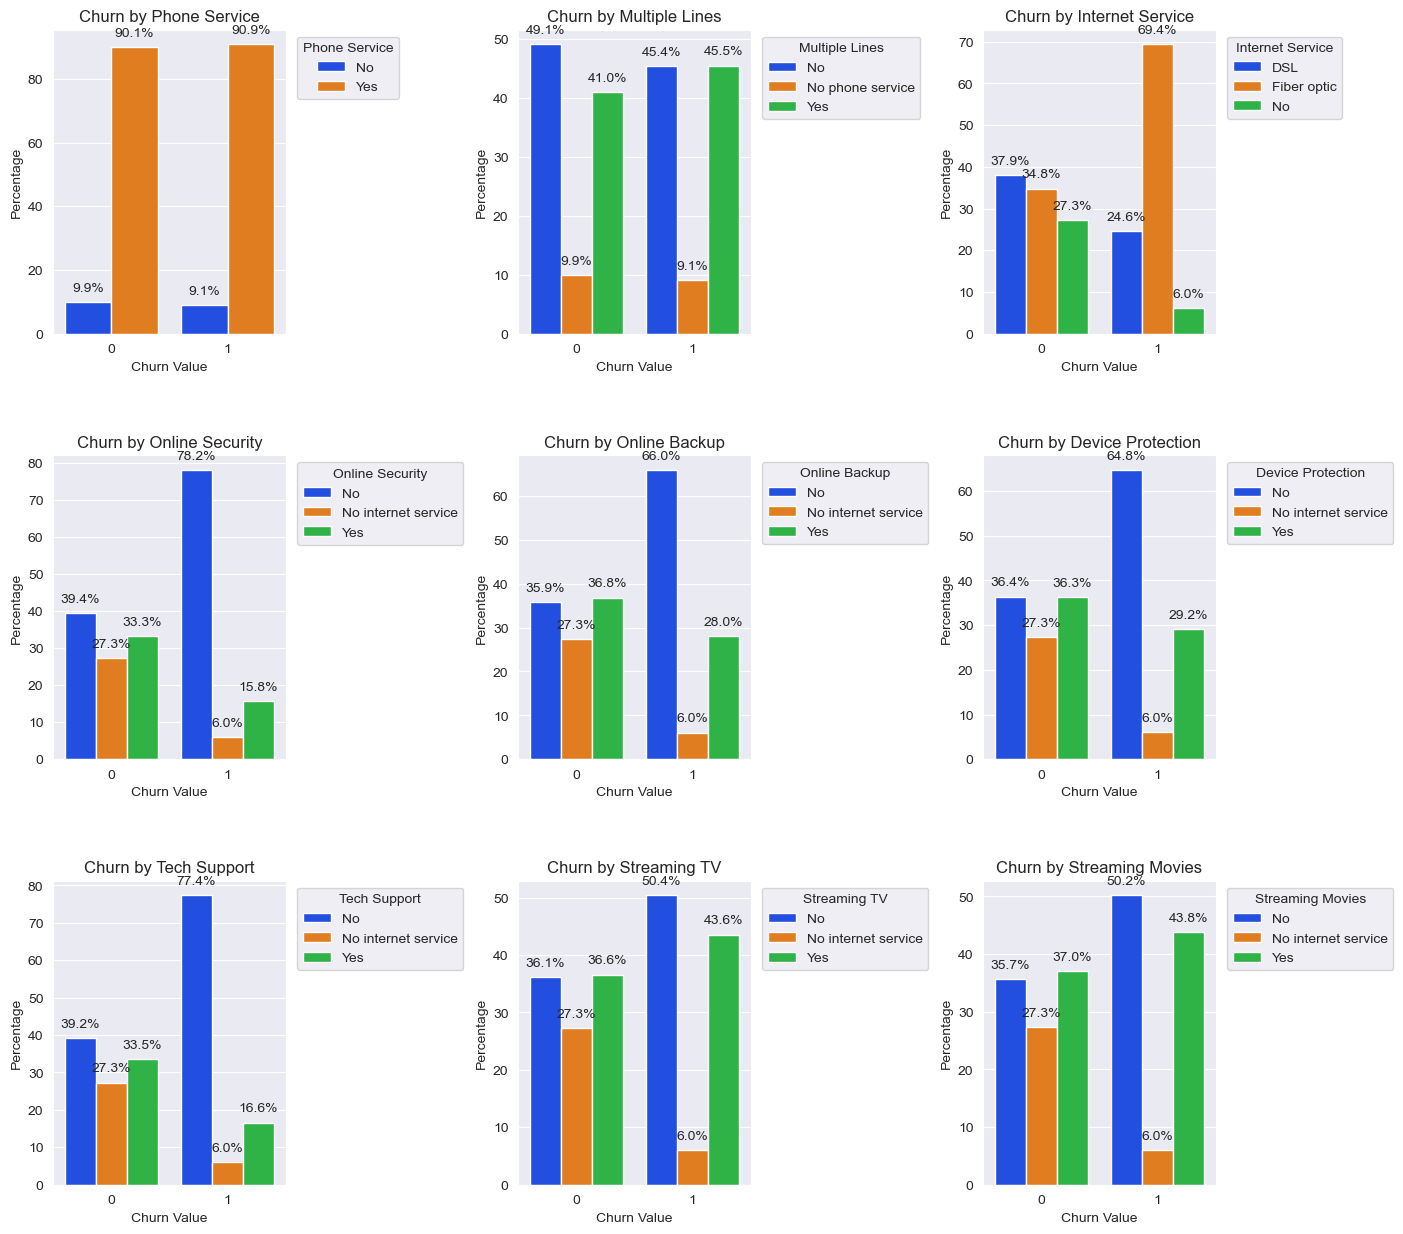

In [260]:
variables = ['Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']
titles = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

# Calculate the number of rows and columns needed based on the number of variables
num_variables = len(variables)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols

    # Calculate the percentage values for each 'Churn_Value' and the current variable
    perct_df = df.groupby('Churn_Value')[variable].value_counts(normalize=True).mul(100).rename('Percentage').reset_index().sort_values(by=variable)

    sns.barplot(data=perct_df, x='Churn_Value', y='Percentage', hue=variable, ax=axes[row, col], palette='bright')

    # Annotate the percentage values on top of each bar
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    axes[row, col].set_xlabel('Churn Value')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_title(f'Churn by {titles[i]}')
    axes[row, col].legend(title=titles[i], bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1, hspace=0.4)

plt.show()

###### Here we can see that:
* Many of the Churn customers had the Fibre Optic option
* In most cases Churn customers did not have add on packages
* Those that had either the Streaming TV or Movies were more likely to Churn

### Churn Reasons

In [10]:
perct_cr = df.Churn_Reason.value_counts(normalize=True).mul(100).rename('Percentage').reset_index().rename(columns={'index':'Churn Reason'}).head(5)
perct_cr

,Churn Reason,Percentage
0,Attitude of support person,10.272873
1,Competitor offered higher download speeds,10.112360
2,Competitor offered more data,8.667737
3,Don't know,8.239700
4,Competitor made better offer,7.490637


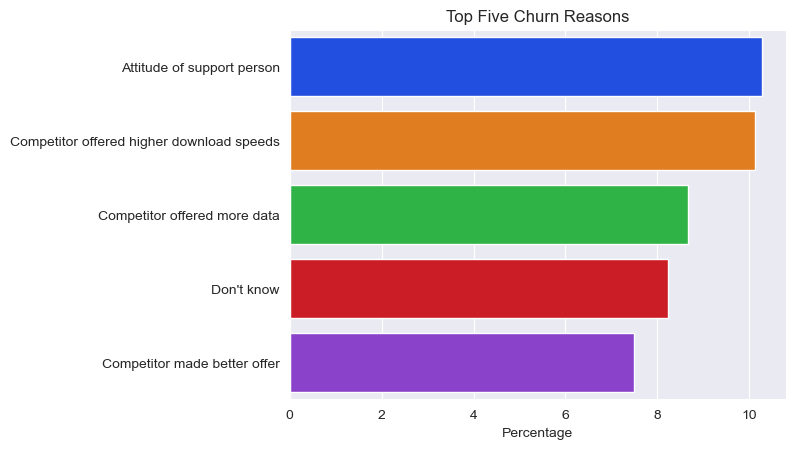

In [262]:
sns.barplot(perct_cr, x='Percentage', y='Churn Reason', palette='bright')

plt.title('Top Five Churn Reasons')
plt.ylabel('')

plt.show()

###### Here we can see that the most common reason for customer's churning is the attitude of the support person that they are dealing with at 10% of all Churn Reasons

###### As there are over 20 Churn Reasons, we have compiled them into smaller categories to help consolidate and spot patterns

#### Consolidating Churn Reasons

* *Product_Competitor* are those reason to do with the strength of the competitors product
&nbsp;
* *CS_Problem* is a problem relating to our customer service
&nbsp;
* *Product_Problem* relates to problems with our own products
&nbsp;
* *Price_Competitor* is our competitor beating us on price
&nbsp;
* *Price_Problem* is customers thinking our price is too high
&nbsp;
* *Charges_Problem* is customers having issue with extra charges on our products

In [12]:
churn_reason = {'Competitor made better offer': 'Price_Competitor',
                'Competitor had better devices': 'Product_Competitor',
                'Competitor offered higher download speeds': 'Product_Competitor',
                'Competitor offered more data': 'Product_Competitor',
                'Price too high': 'Price_Problem',
                'Product dissatisfaction': 'Product_Problem',
                'Service dissatisfaction': 'Product_Problem',
                'Lack of self-service on Website': 'CS_Problem',
                'Network reliability': 'Product_Problem',
                'Limited range of services': 'Product_Problem',
                'Lack of affordable download/upload speed': 'Product_Problem',
                'Long distance charges': 'Charges_Problem',
                'Extra data charges': 'Charges_Problem',
                'Poor expertise of online support': 'CS_Problem',
                'Poor expertise of phone support': 'CS_Problem',
                'Attitude of service provider': 'CS_Problem',
                'Attitude of support person': 'CS_Problem'}

for old, new in churn_reason.items():
    df.Churn_Reason = df.Churn_Reason.replace(old, new)

In [13]:
df_cr = df.Churn_Reason.value_counts(normalize=True).mul(100).rename('Percentage').reset_index().rename(columns={'index':'Churn Reason'}).head()
df_cr

,Churn Reason,Percentage
0,Product_Competitor,25.735688
1,CS_Problem,24.291065
2,Product_Problem,20.438737
3,Don't know,8.239700
4,Price_Competitor,7.490637


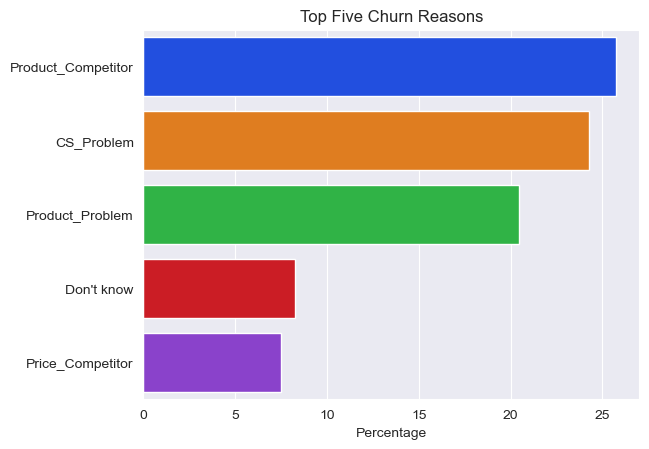

In [265]:
sns.barplot(df_cr, x='Percentage', y='Churn Reason', palette='bright')

plt.title('Top Five Churn Reasons')
plt.ylabel('')

plt.show()

## Test Train Split

In [14]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Reason'],
      dtype='object')

In [5]:
X_columns = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
             'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
             'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
             'Multiple_Lines', 'Internet_Service', 'Online_Security',
             'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
             'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
             'Monthly_Charges', 'Total_Charges', 'Churn_Label',
             'Churn_Reason']

X = df[X_columns]
y = df['Churn_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Splitting the test-train data

## Feature Engineering

#### FE Function

In [6]:
def feature_eng (df):
    df = df.copy()

    # Conversion to Binary
    df.Gender = df.Gender.map({'Male':0, 'Female':1})
    df.Senior_Citizen = df.Senior_Citizen.map({'Yes':1, 'No':0})
    df.Partner = df.Partner.map({'Yes':1, 'No':0})
    df.Phone_Service = df.Phone_Service.map({'Yes':1, 'No':0})
    df.Paperless_Billing = df.Paperless_Billing.map({'Yes':1, 'No':0})
    df.Dependents = df.Dependents.map({'Yes':1, 'No':0})

    # One Hot Encoding
    df = pd.get_dummies(df, columns = ['Multiple_Lines'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Internet_Service'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Online_Security'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Online_Backup'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Device_Protection'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Tech_Support'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Streaming_TV'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Streaming_Movies'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True)
    df = pd.get_dummies(df, columns = ['Payment_Method'], drop_first = True)

    return df

In [7]:
X_train_fe = feature_eng(X_train)                                           # feature engineering the train dataset
X_train_fe.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
2142,9571-EDEBV,1,United States,California,San Diego,92119,"32.802959, -117.027095",32.802959,-117.027095,0,...,0,0,1,0,1,1,0,1,0,0
1623,7562-GSUHK,1,United States,California,Jamestown,95327,"37.84771, -120.486589",37.847710,-120.486589,1,...,0,0,0,0,1,0,0,1,0,0
6074,2325-WINES,1,United States,California,Littlerock,93543,"34.505273, -117.955054",34.505273,-117.955054,1,...,0,0,1,0,1,1,0,1,0,0
1362,9381-NDKME,1,United States,California,El Monte,91731,"34.079934, -118.046695",34.079934,-118.046695,1,...,0,0,0,0,1,0,0,1,0,0
6754,2164-SOQXL,1,United States,California,Los Angeles,90043,"33.988543, -118.334081",33.988543,-118.334081,1,...,0,1,0,1,0,0,0,0,0,1


#### Correlation Matrix

###### Now that our data is all numerical we can run a full Correlation Matrix

In [8]:
corr_data = X_train.join(y_train)
corr_data = feature_eng(corr_data)
corr_columns = ['Tenure_Months', 'Contract_Two year', 'Dependents', 'Online_Security_Yes', 'Tech_Support_Yes', 'Partner', 'Internet_Service_Fiber optic', 'Payment_Method_Electronic check', 'Monthly_Charges', 'Senior_Citizen', 'Churn_Value']
corr_data[corr_columns].corr().Churn_Value

Tenure_Months                     -0.353994
Contract_Two year                 -0.305353
Dependents                        -0.242701
Online_Security_Yes               -0.167930
Tech_Support_Yes                  -0.160711
Partner                           -0.150878
Internet_Service_Fiber optic       0.303433
Payment_Method_Electronic check    0.300384
Monthly_Charges                    0.193758
Senior_Citizen                     0.151027
Churn_Value                        1.000000
Name: Churn_Value, dtype: float64

##### Here is the Correlation Matrix of the Features with the highest correlation, positive and negative.

##### Summary:

* *Tenure Months* and *Contract Two Year* are the top two in terms of negative correlation, indicating they *decrease the likelihood* of Churn
&nbsp;
* *Online Security* and *Tech Support* add-on packages also have *negative correlation* with Churn, should be a focus of Sales incentives
&nbsp;
* The *Fibre Optic* package has the largest positive correlation, indicating it is the *biggest reason for Churn*
&nbsp;
* The *Electronic check* also has a large correlation, indicating it makes it *easier for customer to Churn*

#### Resolving class imbalance - Upsampling the data

In [9]:
Xy_train = X_train_fe.join(y_train)
Xy_train.Churn_Value.value_counts()                                       # finding the frequency of each class in train data

0    4165
1    1469
Name: Churn_Value, dtype: int64

###### Here we can see the striking class imbalance within the dataset, which could affect the accuracy of the model.

###### Upsampling will allow us to balance these classes and ensure higher accuracy in the model

In [10]:
majority = Xy_train[Xy_train['Churn_Value'] == 0]                       # copying the entries in class 0 to a dataframe
minority = Xy_train[Xy_train['Churn_Value'] == 1]                       # copying the entries in class 1 to a dataframe

minority_upsampled = resample(minority, replace=True, n_samples=4165, random_state=123)   # Upsample minority class
upsampled = pd.concat([majority, minority_upsampled])                       # Combine majority class with upsampled minority class
upsampled['Churn_Value'].value_counts()                                     # Display new class counts

0    4165
1    4165
Name: Churn_Value, dtype: int64

In [11]:
upsampled.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Churn_Value
2142,9571-EDEBV,1,United States,California,San Diego,92119,"32.802959, -117.027095",32.802959,-117.027095,0,...,0,1,0,1,1,0,1,0,0,0
6074,2325-WINES,1,United States,California,Littlerock,93543,"34.505273, -117.955054",34.505273,-117.955054,1,...,0,1,0,1,1,0,1,0,0,0
6754,2164-SOQXL,1,United States,California,Los Angeles,90043,"33.988543, -118.334081",33.988543,-118.334081,1,...,1,0,1,0,0,0,0,0,1,0
2722,8777-PVYGU,1,United States,California,Burson,95225,"38.183918, -120.898817",38.183918,-120.898817,1,...,0,1,0,0,1,0,0,0,1,0
4006,7446-SFAOA,1,United States,California,Santa Rosa,95407,"38.394091, -122.739814",38.394091,-122.739814,1,...,1,0,1,0,1,0,0,0,0,0


## Modelling

#### Selecting Feature Columns

###### The below feature columns are the ones we first identified, we then ran the feature importance method to evaluate them

In [274]:
#feature_cols = ['Senior_Citizen', 'Dependents','Tenure_Months', 'Paperless_Billing', 'Monthly_Charges', 'Internet_Service_Fiber optic', 'Internet_Service_No', 'Online_Security_No internet service', 'Online_Security_Yes', 'Online_Backup_No internet service', 'Device_Protection_No internet service', 'Tech_Support_No internet service', 'Tech_Support_Yes', 'Streaming_TV_No internet service', 'Streaming_Movies_No internet service', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Electronic check']                     # selecting the columns with correlation greater than 20% for training the model

In [31]:
# feature_cols = ['Senior_Citizen', 'Dependents','Tenure_Months', 'Paperless_Billing', 'Monthly_Charges', 'Internet_Service_Fiber optic', 'Online_Security_Yes', 'Device_Protection_No internet service', 'Tech_Support_Yes', 'Streaming_TV_No internet service', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Electronic check']                                   # dropping a few more columns after calculating feature importance

###### This is the finalised list of feature columns that we used in our models

In [12]:
feature_cols = ['Dependents','Tenure_Months', 'Monthly_Charges', 'Internet_Service_Fiber optic', 'Contract_One year', 'Contract_Two year', 'Payment_Method_Electronic check']

In [13]:
X_train_upsampled = upsampled[feature_cols]                                  # feature set
y_train_upsampled = upsampled['Churn_Value']                                 # dependent set

### Decision Tree Classifier

###### We ran the GridSearch to find the optimal parameter values for our Decision Tree model

In [33]:
# MODEL SELECTION!

grid = GridSearchCV(estimator = DecisionTreeClassifier(),                   # finding the optimal parameter values for the model
                    param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                  'min_samples_split': [5, 8, 10],
                                  'min_samples_leaf': [3, 4, 5, 6, 7],
                                  'max_features':[5, 10, 15, 20]},
                    cv = 10, refit = True, verbose = 1, scoring = 'accuracy')   # choosing accuracy as the best metric because our train data is class                                                                 balanced

In [34]:
grid.fit(X_train_upsampled, y_train_upsampled)                              # fitting the train data into the model

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [5, 8, 10]},
             scoring='accuracy', verbose=1)

In [35]:
grid.best_params_                                                       # getting the best parameters

{'max_depth': 9,
 'max_features': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

###### Here we are applying those best parameters, but adjusting to find the model that was both accurate but also with limited overfitting

In [14]:
dt = DecisionTreeClassifier(max_depth=4, max_features=20, min_samples_leaf=3, min_samples_split=5, random_state=42)  # modelling a Decision Tree Classifier adjusting the best parameters to remove overfitting

In [15]:
dt.fit(X_train_upsampled, y_train_upsampled)                              # fitting the train data into the model

DecisionTreeClassifier(max_depth=4, max_features=20, min_samples_leaf=3,
                       min_samples_split=5, random_state=42)

###### The feature importance method in action

In [40]:
dt.feature_importances_                                                                 # calculating the feature importance
importance = list(zip(feature_cols, list(dt.feature_importances_)))
importance

[('Senior_Citizen', 0.0),
 ('Dependents', 0.03930943123685151),
 ('Tenure_Months', 0.10592895267370576),
 ('Paperless_Billing', 0.0),
 ('Monthly_Charges', 0.03628137765042348),
 ('Internet_Service_Fiber optic', 0.10410234620695256),
 ('Online_Security_Yes', 0.0),
 ('Device_Protection_No internet service', 0.0),
 ('Tech_Support_Yes', 0.0),
 ('Streaming_TV_No internet service', 0.0),
 ('Contract_One year', 0.26488649928933866),
 ('Contract_Two year', 0.4455575511076623),
 ('Payment_Method_Electronic check', 0.003933841835065691)]

#### Decision Tree Predictions

##### On Train

In [16]:
# Prediction on train dataset

train_results = X_train_upsampled.copy()
train_results['y_pred'] = dt.predict(X_train_upsampled)                           # populating the prediction values
train_results['y_real'] = y_train_upsampled                                       # populating the real y values
train_results['y_prob'] = dt.predict_proba(X_train_upsampled)[:,1]                # populating the probability of being class 1
train_results                                                                     # displaying the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,y_pred,y_real,y_prob
2142,0,71,98.65,1,1,0,0,0,0,0.481707
6074,0,32,104.05,1,1,0,0,0,0,0.481707
6754,1,20,20.05,0,0,0,0,0,0,0.415348
2722,0,52,64.30,0,1,0,0,0,0,0.207874
4006,0,37,19.85,0,1,0,0,0,0,0.207874
...,...,...,...,...,...,...,...,...,...,...
1717,0,58,93.40,1,0,0,0,1,1,0.646715
195,0,46,110.00,1,1,0,1,0,1,0.481707
243,0,8,100.30,1,0,0,0,1,1,0.857726
866,0,4,85.65,1,0,0,1,1,1,0.857726


##### On Test

In [17]:
X_test_fe = feature_eng(X_test)[feature_cols]                                       # feature engineering the test dataset

In [18]:
# Prediction on test dataset

test_results = X_test_fe.copy()
test_results['y_pred'] = dt.predict(X_test_fe)                                      # populating the prediction values
test_results['y_real'] = y_test                                                     # populating the real y values
test_results['y_prob'] = dt.predict_proba(X_test_fe)[:,1]                           # populating the probability of being class 1
test_results                                                                        # displaying the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,y_pred,y_real,y_prob
185,0,15,85.90,1,0,0,0,1,1,0.857726
2715,0,18,56.80,0,0,0,0,0,0,0.415348
3825,0,2,20.00,0,0,0,0,1,0,0.692132
1807,0,6,84.20,1,0,0,1,1,1,0.857726
132,0,40,104.80,1,0,0,0,1,1,0.646715
...,...,...,...,...,...,...,...,...,...,...
6366,1,66,104.90,1,1,0,1,0,0,0.000000
315,0,19,86.00,1,0,0,0,1,1,0.646715
2439,0,2,90.35,1,0,0,1,1,0,0.857726
5002,1,68,110.20,1,0,1,1,0,0,0.000000


##### Function to assess the Accuracy, Precision and Recall of the model

In [19]:
def apr(y_pred, y_real):                                            # function to calculate the accuracy, precision and recall
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

def produce_confusion(positive_label:str, negative_label:str, cut_off, df, y_pred_name, y_real_name):   # function to print the confusion matrix

    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.

    if cut_off != 'binary':
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else:
        df['pred_binary'] = df[y_pred_name]

    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g');

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

##### Assessing Accuracy, Precision and Recall

In [20]:
train_scores = apr(train_results['y_pred'], train_results['y_real'])    # calculating the evaluation metrics for train data

Accuracy:0.7571428571428571
Precision:0.7545152091254753
Recall:0.7623049219687875
F1:0.7583900632986982


In [21]:
test_scores = apr(test_results['y_pred'], test_results['y_real'])       # calculating the evaluation metrics for test data

Accuracy:0.7480482611781405
Precision:0.539543057996485
Recall:0.7675
F1:0.6336429308565531


##### Confusion Matrix

Accuracy =  0.7571428571428571


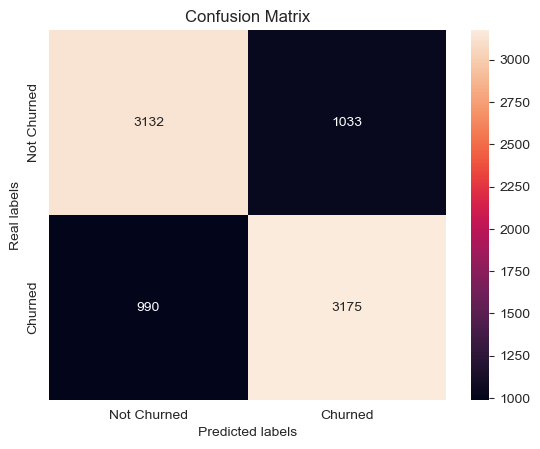

In [22]:
train_confusion = produce_confusion('Churned', 'Not Churned', 'binary', train_results, 'y_pred', 'y_real')  # printing the confusion matrix for train data

Accuracy =  0.7480482611781405


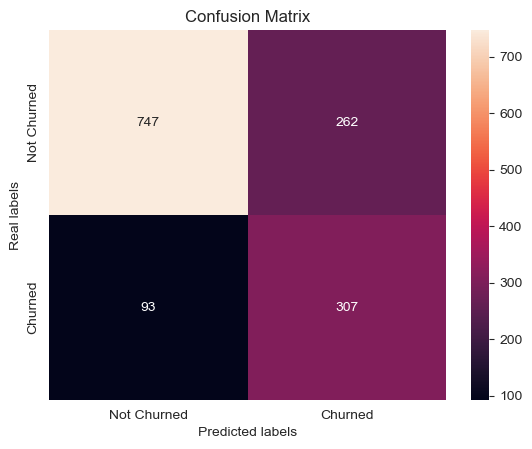

In [23]:
test_confusion = produce_confusion('Churned', 'Not Churned', 'binary', test_results, 'y_pred', 'y_real')    # printing the confusion matrix for test data

### Random Forest Classifier

##### Fitting and Finding Optimal Parameters

In [24]:
rf = RandomForestClassifier(n_estimators=50)                                            # intialising the Random Forest Classifier

In [25]:
rf_score = cross_val_score(rf, X_train_upsampled, y_train_upsampled, cv=10)             # calculating the cross validation score for each folds

In [26]:
print(f'Random scored {rf_score}')                                                      # print the score

Random scored [0.87034814 0.91236495 0.90996399 0.90156062 0.88355342 0.88595438
 0.90396158 0.86794718 0.89435774 0.8847539 ]


In [27]:
rf_params = {                                                                           # inputting the parameter values
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [3, 4, 5, 6, 7]
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=2, scoring = 'accuracy')                 # finding the optimal parameter values for the model
                                                                                        # choosing accuracy as the best metric because our train data is class balanced
gs.fit(X_train_upsampled, y_train_upsampled)                                            # fitting the train data into the model
gs.best_params_                                                                         # finding the best parameters

{'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 100}

In [28]:
gs.score(X_train_upsampled, y_train_upsampled)                                          # calculating the score for train dataset

0.8403361344537815

##### Predictions

In [29]:
# Prediction on train dataset
train_results_rf = X_train_upsampled.copy()
train_results_rf['y_pred'] = gs.predict(X_train_upsampled)                              # populating the prediction values
train_results_rf['y_real'] = y_train_upsampled                                          # populating the real y values
train_results_rf['y_prob'] = gs.predict_proba(X_train_upsampled)[:,1]                   # populating the probability of being in class 1
train_results_rf                                                                        # printing the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,y_pred,y_real,y_prob
2142,0,71,98.65,1,1,0,0,0,0,0.210719
6074,0,32,104.05,1,1,0,0,0,0,0.283263
6754,1,20,20.05,0,0,0,0,0,0,0.048604
2722,0,52,64.30,0,1,0,0,0,0,0.242611
4006,0,37,19.85,0,1,0,0,0,0,0.042892
...,...,...,...,...,...,...,...,...,...,...
1717,0,58,93.40,1,0,0,0,1,1,0.506842
195,0,46,110.00,1,1,0,1,1,1,0.653013
243,0,8,100.30,1,0,0,0,1,1,0.883545
866,0,4,85.65,1,0,0,1,1,1,0.870604


In [30]:
# Prediction on test dataset
test_results_rf = X_test_fe.copy()
test_results_rf['y_pred'] = gs.predict(X_test_fe)                                        # populating the prediction values
test_results_rf['y_real'] = y_test                                                      # populating the real y values
test_results_rf['y_prob'] = gs.predict_proba(X_test_fe)[:,1]                            # populating the probability of being in class 1
test_results_rf                                                                         # printing the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,y_pred,y_real,y_prob
185,0,15,85.90,1,0,0,0,1,1,0.793462
2715,0,18,56.80,0,0,0,0,0,0,0.421403
3825,0,2,20.00,0,0,0,0,0,0,0.344677
1807,0,6,84.20,1,0,0,1,1,1,0.864541
132,0,40,104.80,1,0,0,0,1,1,0.716334
...,...,...,...,...,...,...,...,...,...,...
6366,1,66,104.90,1,1,0,1,0,0,0.018593
315,0,19,86.00,1,0,0,0,1,1,0.653801
2439,0,2,90.35,1,0,0,1,1,0,0.890578
5002,1,68,110.20,1,0,1,1,0,0,0.007143


##### Assessing Accuracy, Precision and Recall

In [31]:
train_scores_rf = apr(train_results_rf['y_pred'], train_results_rf['y_real'])           # calculating the evaluation metrics for train data

Accuracy:0.8403361344537815
Precision:0.799240025332489
Recall:0.9090036014405762
F1:0.8505953718265559


In [32]:
test_scores_rf = apr(test_results_rf['y_pred'], test_results_rf['y_real'])              # calculating the evaluation metrics for test data

Accuracy:0.7558552164655784
Precision:0.5481099656357389
Recall:0.7975
F1:0.6496945010183299


##### Confusion Matrix

Accuracy =  0.8403361344537815


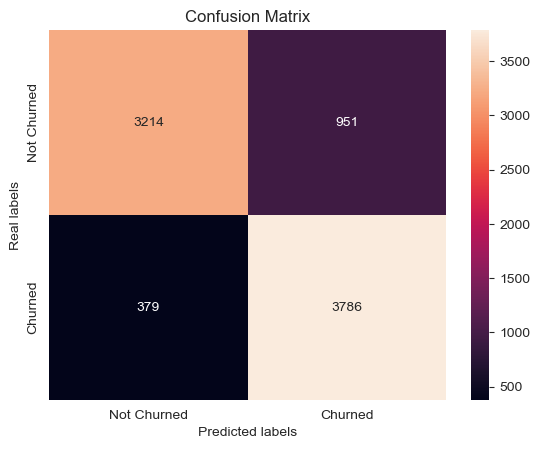

In [33]:
train_confusion_rf = produce_confusion('Churned', 'Not Churned', 'binary', train_results_rf, 'y_pred', 'y_real')    # printing the confusion matrix for train data

Accuracy =  0.7558552164655784


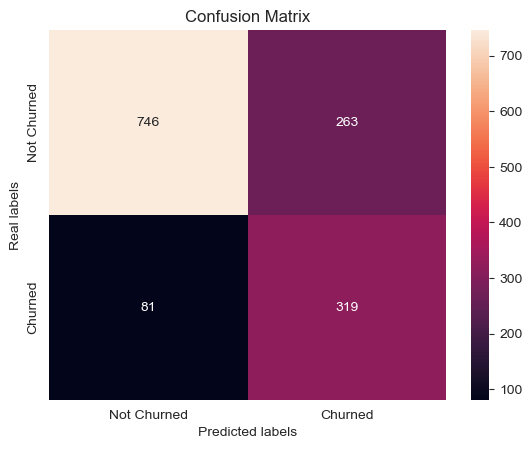

In [34]:
test_confusion_rf = produce_confusion('Churned', 'Not Churned', 'binary', test_results_rf, 'y_pred', 'y_real')  # printing the confusion matrix for test data

### Logistic Regression

##### Fitting the Model

In [35]:
lr = LogisticRegression(max_iter=300, random_state=42)                              # Logistic Regression model

In [36]:
lr = lr.fit(X_train_upsampled, y_train_upsampled)                                   # fitting the model with train data

##### Predictions

In [37]:
# Prediction on train dataset
train_results_lr = X_train_upsampled.copy()
train_results_lr['y_pred'] = lr.predict(X_train_upsampled)                          # populating the prediction values
train_results_lr['y_real'] = y_train_upsampled                                      # populating the real y values
train_results_lr['y_prob'] = lr.predict_proba(X_train_upsampled)[:,1]               # populating the probability for being in class 1
train_results_lr                                                                    # printing the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,y_pred,y_real,y_prob
2142,0,71,98.65,1,1,0,0,0,0,0.222071
6074,0,32,104.05,1,1,0,0,1,0,0.515649
6754,1,20,20.05,0,0,0,0,0,0,0.123860
2722,0,52,64.30,0,1,0,0,0,0,0.157328
4006,0,37,19.85,0,1,0,0,0,0,0.127796
...,...,...,...,...,...,...,...,...,...,...
1717,0,58,93.40,1,0,0,0,0,1,0.497367
195,0,46,110.00,1,1,0,1,1,1,0.573570
243,0,8,100.30,1,0,0,0,1,1,0.842454
866,0,4,85.65,1,0,0,1,1,1,0.895330


In [38]:
# Prediction on test dataset
test_results_lr = X_test_fe.copy()
test_results_lr['y_pred'] = lr.predict(X_test_fe)                                   # populating the prediction values
test_results_lr['y_real'] = y_test                                                  # populating the real y values
test_results_lr['y_prob'] = lr.predict_proba(X_test_fe)[:,1]                        # populating the probability for being in class 1
test_results_lr                                                                     # printing the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,y_pred,y_real,y_prob
185,0,15,85.90,1,0,0,0,1,1,0.772812
2715,0,18,56.80,0,0,0,0,1,0,0.547513
3825,0,2,20.00,0,0,0,0,1,0,0.525700
1807,0,6,84.20,1,0,0,1,1,1,0.886954
132,0,40,104.80,1,0,0,0,1,1,0.677059
...,...,...,...,...,...,...,...,...,...,...
6366,1,66,104.90,1,1,0,1,0,0,0.129122
315,0,19,86.00,1,0,0,0,1,1,0.750219
2439,0,2,90.35,1,0,0,1,1,0,0.907631
5002,1,68,110.20,1,0,1,1,0,0,0.060043


##### Evaluating Accuracy, Precision and Recall

In [39]:
train_scores_lr = apr(train_results_lr['y_pred'], train_results_lr['y_real'])       # calculating the evaluation metrics for train data

Accuracy:0.7728691476590637
Precision:0.7447770837820374
Recall:0.8302521008403362
F1:0.7851952770208901


In [40]:
test_scores_lr = apr(test_results_lr['y_pred'], test_results_lr['y_real'])          # calculating the evaluation metrics for test data

Accuracy:0.7331440738112136
Precision:0.5190476190476191
Recall:0.8175
F1:0.6349514563106796


##### Confusion Matrix

Accuracy =  0.7728691476590637


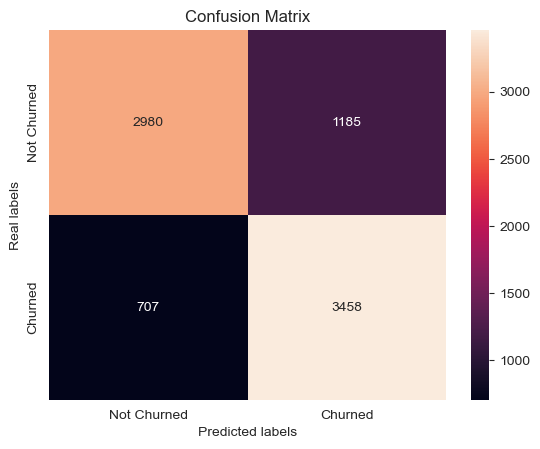

In [41]:
train_confusion_lr = produce_confusion('Churned', 'Not Churned', 'binary', train_results_lr, 'y_pred', 'y_real')    # printing the confusion matrix for train data

Accuracy =  0.7331440738112136


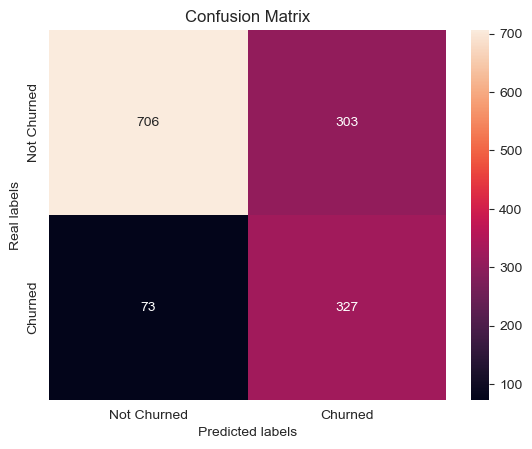

In [42]:
test_confusion_lr = produce_confusion('Churned', 'Not Churned', 'binary', test_results_lr, 'y_pred', 'y_real')      # printing the confusion matrix for test data

##### After evaluating the performance of all three models, it was found that the Decision Tree was ultimately the best as it had the least overfitting with a reasonable level of accuracy. However, all of the models have a good recall score which is important as we do not want to miss out on potential churners.

##### When it came to producing the of 500 most likely to churn, we decided to use all three models, if at least two of the models had probability above 0.5 then it was predicted as likely to Churn. These were then ranked by the mean probability of all three models.

### Customer List of 500 most likely to Churn

###### Seperating out those who haven't Churned

In [43]:
df_class0 = df[df['Churn_Value'] == 0]                                          # dataframe with only class 0, i.e., customers who haven't churned yet

In [44]:
df_class0.drop(columns=['Churn_Value', 'Churn_Label', 'Churn_Reason'], axis=1, inplace=True)    # dropping the unnecessary columns

C:\Users\lawre\AppData\Local\Temp\ipykernel_24740\3855259436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class0.drop(columns=['Churn_Value', 'Churn_Label', 'Churn_Reason'], axis=1, inplace=True)    # dropping the unnecessary columns


In [45]:
df_class0

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


###### Feature Engineering and Generating Probabilities

In [46]:
df_list = feature_eng(df_class0)[feature_cols]                                  # feature engineering and fetching only the feature set from the dataframe
df_list['Probability_dt'] = dt.predict_proba(df_list)[:,1]                      # populating the probability to churn using decision tree model
df_list['Probability_rf'] = gs.predict_proba(df_list[feature_cols])[:,1]        # populating the probability to churn using random forest model
df_list['Probability_lr'] = lr.predict_proba(df_list[feature_cols])[:,1]        # populating the probability to churn using Logistic Regression model
df_list.head()                                                                         # displaying the dataframe

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,Probability_dt,Probability_rf,Probability_lr
1869,0,1,29.85,0,0,0,1,0.692132,0.857895,0.705222
1870,0,34,56.95,0,1,0,0,0.207874,0.190588,0.226338
1871,0,45,42.30,0,1,0,0,0.207874,0.209207,0.140450
1872,1,22,89.10,1,0,0,0,0.646715,0.063855,0.392317
1873,0,10,29.75,0,0,0,0,0.415348,0.519899,0.501896


###### Finding the mean probability Across the three models

In [47]:
df_list['mean_prob'] = df_list[['Probability_dt', 'Probability_rf', 'Probability_lr']].mean(axis=1)*100   # finding the mean probability among all the three

###### Evaluating the combined prediction

In [48]:
def find_prob(x):
    ''' The function returns the prediction as 1, if the majority of the three model have a probability > 0.5'''

    if (x['Probability_dt'] >0.5 and x['Probability_rf'] >0.5) or (x['Probability_lr'] > 0.5 and x['Probability_dt'] >0.5) or (x['Probability_rf'] >0.5 and x['Probability_lr'] >0.5):
        return 1
    else:
        return 0

In [49]:
df_list['prediction'] = df_list.apply (lambda x: find_prob(x), axis=1)          # create a prediction column using the find_prob function

In [50]:
df_list.head()

,Dependents,Tenure_Months,Monthly_Charges,Internet_Service_Fiber optic,Contract_One year,Contract_Two year,Payment_Method_Electronic check,Probability_dt,Probability_rf,Probability_lr,mean_prob,prediction
1869,0,1,29.85,0,0,0,1,0.692132,0.857895,0.705222,75.174961,1
1870,0,34,56.95,0,1,0,0,0.207874,0.190588,0.226338,20.826672,0
1871,0,45,42.30,0,1,0,0,0.207874,0.209207,0.140450,18.584360,0
1872,1,22,89.10,1,0,0,0,0.646715,0.063855,0.392317,36.762937,0
1873,0,10,29.75,0,0,0,0,0.415348,0.519899,0.501896,47.904781,1


In [51]:
df_churn_list = df_class0.join(df_list[['mean_prob','prediction']])               # left join the two datasets based on the index, so that probability is populated into the original dataset

In [52]:
df_churn_list.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,mean_prob,prediction
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,75.174961,1
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,No,No,No,One year,No,Mailed check,56.95,1889.5,20.826672,0
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,18.584360,0
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,36.762937,0
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,47.904781,1


### Final 500 list

###### This will take the all of those predicted by majority to Churn and then sort them by mean probability to find the Top 500

In [54]:
df_final_list = df_churn_list[df_churn_list['prediction'] == 1]     # copying only the customers who have been predicted as likely to churn, by a majority of the three models
df_top_500 = df_final_list.sort_values(by='mean_prob', ascending=False).head(500)    # copying the top 500 most likely to churn customer details into a new dataframe
df_top_500['Rank'] = df_top_500['mean_prob'].rank(method='min', ascending=False)           # adding the rank column
df_top_500[['CustomerID', 'Rank', 'mean_prob']]                               # displaying only the customer ID and their probabilities of churning

,CustomerID,Rank,mean_prob
3518,1393-IMKZG,1.0,91.529759
5657,7577-SWIFR,2.0,91.174089
2676,7439-DKZTW,3.0,90.796628
6213,1628-BIZYP,4.0,89.833023
5525,7379-FNIUJ,5.0,89.616652
...,...,...,...
5011,9732-EQMWY,496.0,70.148018
6126,7401-RUBNK,497.0,70.097145
6986,4690-PKDQG,498.0,70.079702
4241,0585-EGDDA,499.0,70.048187


### Churn Risk of remaining customers

In [55]:
df_remaining = df_churn_list.sort_values(by='mean_prob', ascending=False)    # sorting the mean probability in descending order
df_remaining.head()                                                             # displaying the dataframe

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,mean_prob,prediction
3518,1393-IMKZG,1,United States,California,Fullerton,92831,"33.879983, -117.895482",33.879983,-117.895482,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.85,95.85,91.529759,1
5657,7577-SWIFR,1,United States,California,Glendale,91206,"34.162515, -118.203869",34.162515,-118.203869,Male,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.25,89.25,91.174089,1
2676,7439-DKZTW,1,United States,California,Paicines,95043,"36.525703, -120.952122",36.525703,-120.952122,Male,...,No,Yes,No,Month-to-month,Yes,Electronic check,80.55,80.55,90.796628,1
6213,1628-BIZYP,1,United States,California,Brentwood,94513,"37.908242, -121.682472",37.908242,-121.682472,Male,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85,89.833023,1
5525,7379-FNIUJ,1,United States,California,Olympic Valley,96146,"39.191797, -120.212401",39.191797,-120.212401,Male,...,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.5,89.616652,1


###### Final Table displaying the rest of the customers and their Churn probability

In [56]:
df_remaining[['CustomerID','mean_prob']]                                    # displaying only the customer ID and their probabilities of churning

,CustomerID,mean_prob
3518,1393-IMKZG,91.529759
5657,7577-SWIFR,91.174089
2676,7439-DKZTW,90.796628
6213,1628-BIZYP,89.833023
5525,7379-FNIUJ,89.616652
...,...,...
3736,0784-ZQJZX,0.152890
4817,2607-DHDAK,0.152645
6858,5893-KCLGT,0.152523
5569,6928-ONTRW,0.152401
